In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# 'total_failure_rate' 열의 비율(%) 문자열을 실수형으로 변환
data['total_failure_rate'] = data['total_failure_rate'].str.rstrip('%').astype('float') / 100.0

# 지역별로 그룹화하여 일자별 주문취소율 평균 계산
grouped_data = data.groupby(['date', 'region'])['total_failure_rate'].mean().reset_index()

# 피벗 테이블 생성: 행은 'date', 열은 'region', 값은 'total_failure_rate'
pivot_data = grouped_data.pivot("date", "region", "total_failure_rate")

# 히트맵으로 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap="YlGnBu", annot=True, fmt=".2%")
plt.title('일자별, 지역별 주문취소율 비교')
plt.ylabel('날짜')
plt.xlabel('지역')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [10]:
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'  # 사용 가능한 한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지


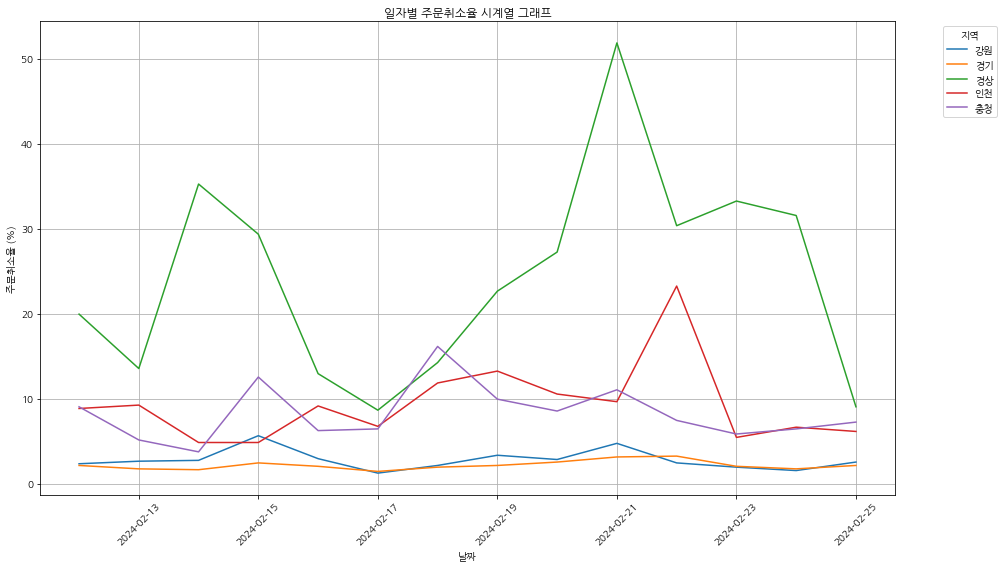

In [11]:


# 시계열 그래프를 위한 데이터 준비
grouped_data['date'] = pd.to_datetime(grouped_data['date'])  # 'date' 열을 datetime 객체로 변환

# 시계열 그래프 그리기
plt.figure(figsize=(14, 8))

# 각 지역별로 그래프를 그림
for region in grouped_data['region'].unique():
    region_data = grouped_data[grouped_data['region'] == region]
    plt.plot(region_data['date'], region_data['total_failure_rate']*100, label=region)

plt.title('일자별 주문취소율 시계열 그래프')
plt.xlabel('날짜')
plt.ylabel('주문취소율 (%)')
plt.legend(title='지역', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


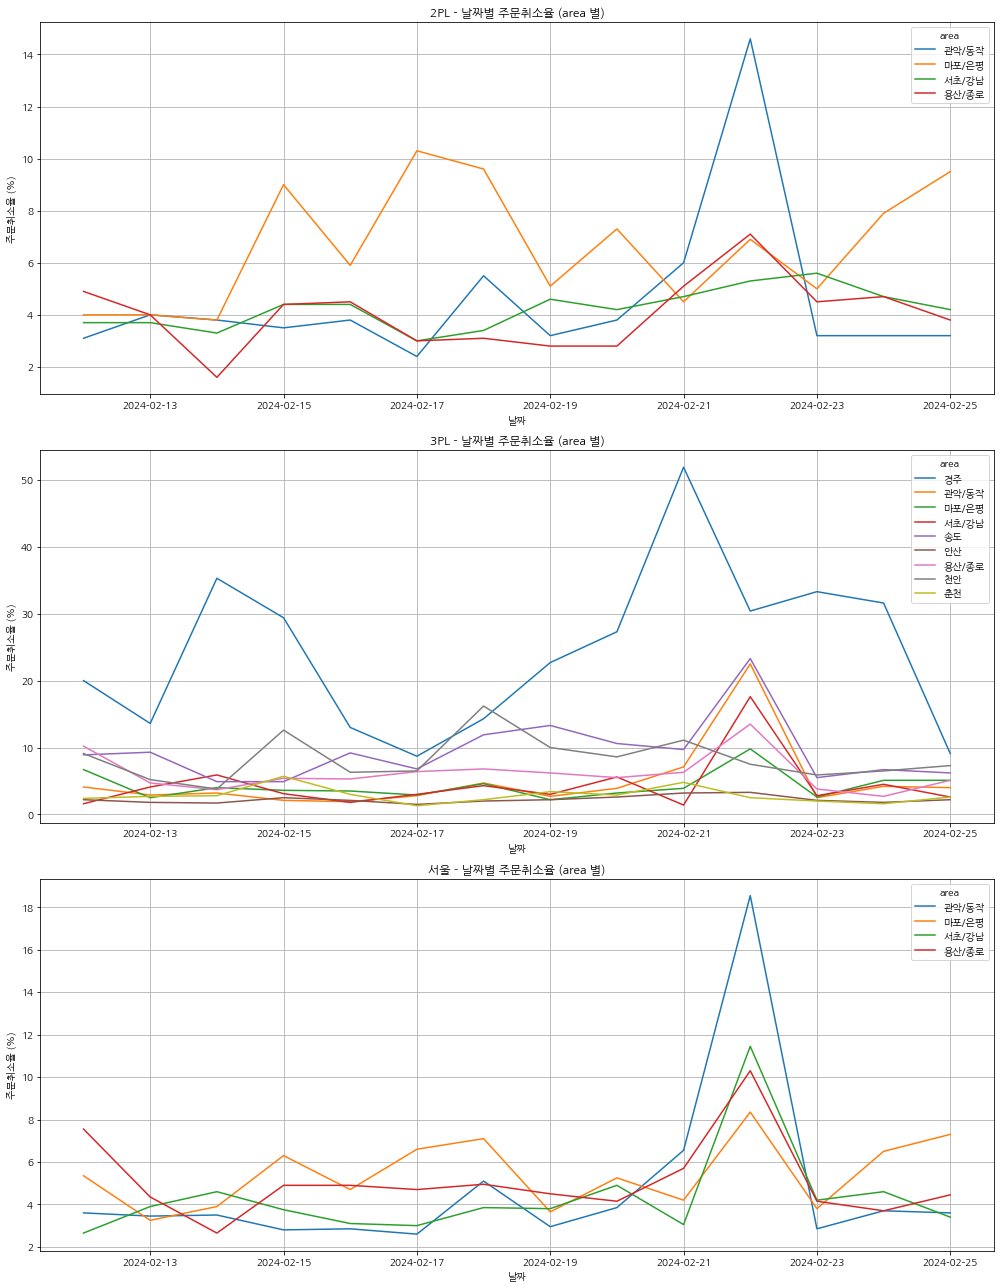

In [13]:
# 새로운 데이터 파일 로드
data_new = pd.read_csv('C:/Users/kidca/Dropbox/project/statpath/task/20240302_김혜민_통계분석/cleaningdata/integrated.csv', encoding = 'utf8')


# 'total_failure_rate' 열의 비율(%) 문자열을 실수형으로 변환
data_new['total_failure_rate'] = data_new['total_failure_rate'].str.rstrip('%').astype('float') / 100.0
data_new['date'] = pd.to_datetime(data_new['date'])  # 'date' 열을 datetime 객체로 변환

# 필요한 데이터 필터링
data_2pl = data_new[data_new['PL'] == '2PL']
data_3pl = data_new[data_new['PL'] == '3PL']
data_seoul = data_new[data_new['region'] == '서울']

# 그래프를 그리기 위한 데이터 그룹화
grouped_2pl = data_2pl.groupby(['date', 'area'])['total_failure_rate'].mean().reset_index()
grouped_3pl = data_3pl.groupby(['date', 'area'])['total_failure_rate'].mean().reset_index()
grouped_seoul = data_seoul.groupby(['date', 'area'])['total_failure_rate'].mean().reset_index()

# 그래프 그리기
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# 그래프 1: 2PL
for area in grouped_2pl['area'].unique():
    area_data = grouped_2pl[grouped_2pl['area'] == area]
    axs[0].plot(area_data['date'], area_data['total_failure_rate']*100, label=area)

axs[0].set_title('2PL - 날짜별 주문취소율 (area 별)')
axs[0].set_xlabel('날짜')
axs[0].set_ylabel('주문취소율 (%)')
axs[0].legend(title='area')
axs[0].grid(True)

# 그래프 2: 3PL
for area in grouped_3pl['area'].unique():
    area_data = grouped_3pl[grouped_3pl['area'] == area]
    axs[1].plot(area_data['date'], area_data['total_failure_rate']*100, label=area)

axs[1].set_title('3PL - 날짜별 주문취소율 (area 별)')
axs[1].set_xlabel('날짜')
axs[1].set_ylabel('주문취소율 (%)')
axs[1].legend(title='area')
axs[1].grid(True)

# 그래프 3: 서울
for area in grouped_seoul['area'].unique():
    area_data = grouped_seoul[grouped_seoul['area'] == area]
    axs[2].plot(area_data['date'], area_data['total_failure_rate']*100, label=area)

axs[2].set_title('서울 - 날짜별 주문취소율 (area 별)')
axs[2].set_xlabel('날짜')
axs[2].set_ylabel('주문취소율 (%)')
axs[2].legend(title='area')
axs[2].grid(True)

plt.tight_layout()
plt.show()


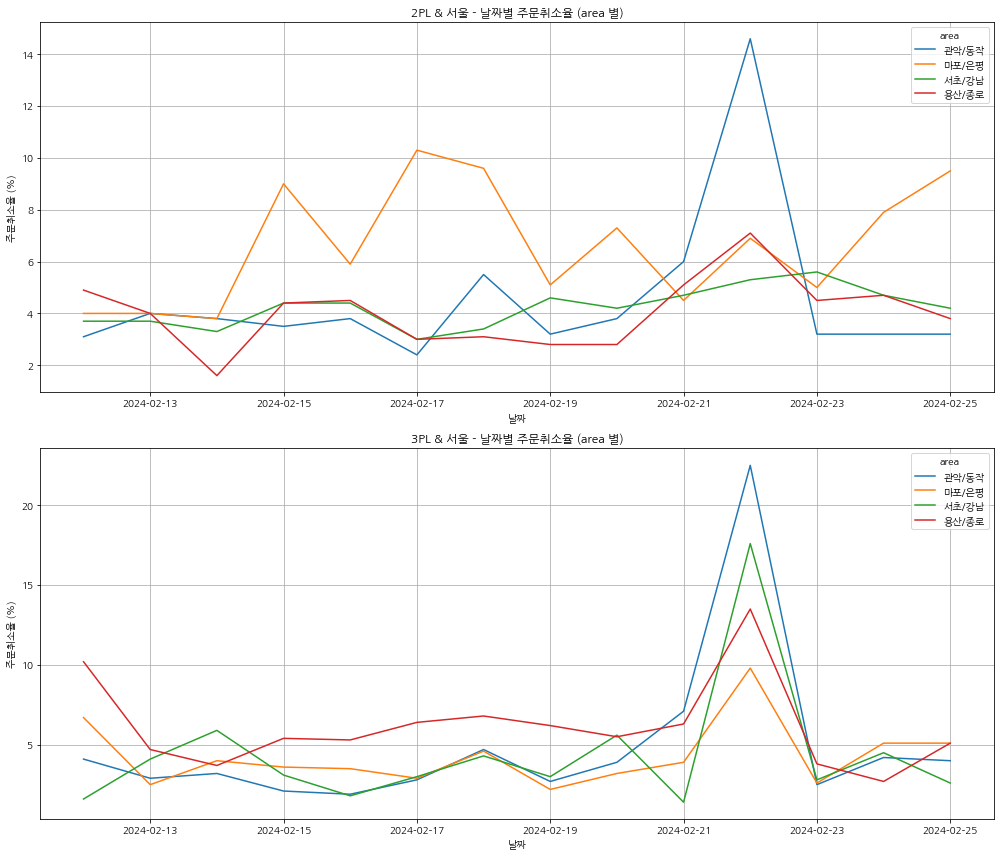

In [14]:
# 필요한 데이터 필터링
data_2pl_seoul = data_new[(data_new['PL'] == '2PL') & (data_new['region'] == '서울')]
data_3pl_seoul = data_new[(data_new['PL'] == '3PL') & (data_new['region'] == '서울')]

# 그래프를 그리기 위한 데이터 그룹화
grouped_2pl_seoul = data_2pl_seoul.groupby(['date', 'area'])['total_failure_rate'].mean().reset_index()
grouped_3pl_seoul = data_3pl_seoul.groupby(['date', 'area'])['total_failure_rate'].mean().reset_index()

# 그래프 그리기
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

# 그래프 1: 2PL & 서울
for area in grouped_2pl_seoul['area'].unique():
    area_data = grouped_2pl_seoul[grouped_2pl_seoul['area'] == area]
    axs[0].plot(area_data['date'], area_data['total_failure_rate']*100, label=area)

axs[0].set_title('2PL & 서울 - 날짜별 주문취소율 (area 별)')
axs[0].set_xlabel('날짜')
axs[0].set_ylabel('주문취소율 (%)')
axs[0].legend(title='area')
axs[0].grid(True)

# 그래프 2: 3PL & 서울
for area in grouped_3pl_seoul['area'].unique():
    area_data = grouped_3pl_seoul[grouped_3pl_seoul['area'] == area]
    axs[1].plot(area_data['date'], area_data['total_failure_rate']*100, label=area)

axs[1].set_title('3PL & 서울 - 날짜별 주문취소율 (area 별)')
axs[1].set_xlabel('날짜')
axs[1].set_ylabel('주문취소율 (%)')
axs[1].legend(title='area')
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 'pickup_delay_*min' 열의 비율(%) 문자열을 실수형으로 변환
for col in ['pickup_delay_5min', 'pickup_delay_10min', 'pickup_delay_15min', 'pickup_delay_20min']:
    data_new[col] = data_new[col].str.rstrip('%').astype('float') / 100.0

# 독립변수(X)와 종속변수(y) 설정
X = data_new[['pickup_delay_5min', 'pickup_delay_10min', 'pickup_delay_15min', 'pickup_delay_20min']]
y = data_new['total_failure_rate']

# 다중회귀분석 모델 학습
model = LinearRegression()
model.fit(X, y)

# 계수(coefficient)와 절편(intercept) 출력
coefficients = model.coef_
intercept = model.intercept_

coefficients, intercept

(array([-0.5425823 ,  0.98815751, -0.78443974,  0.75652899]),
 0.0852586985438422)

In [21]:
import statsmodels.api as sm

# OLS 모델을 위해 상수항 추가
X_with_const = sm.add_constant(X)

# OLS 모델 학습
model_ols = sm.OLS(y, X_with_const).fit()

# 요약 결과 출력
model_ols_summary = model_ols.summary()
model_ols_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_failure_rate   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     19.39
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           3.04e-13
Time:                        17:21:38   Log-Likelihood:                 260.39
No. Observations:                 182   AIC:                            -510.8
Df Residuals:                     177   BIC:                            -494.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0853      0.022      3.842      0.000       0.041       0.129
pickup_delay_5min     -0.5426      0.144     -3.760      0.000      -0.827      -0.258
pickup_delay_10min     0.9882      0.243      4.067      0.000       0.509       1.468
pickup_delay_15min    -0.7844      0.270     -2.907      0.004      -1.317      -0.252
pickup_delay_20min     0.7565      0.208      3.645      0.000       0.347       1.166
==============================================================================
Omnibus:                      141.353   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1348.084
Skew:                           2.960   Prob(JB):                    1.85e-293
Kurtosis:                      14.947   Cond. No.                         91.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

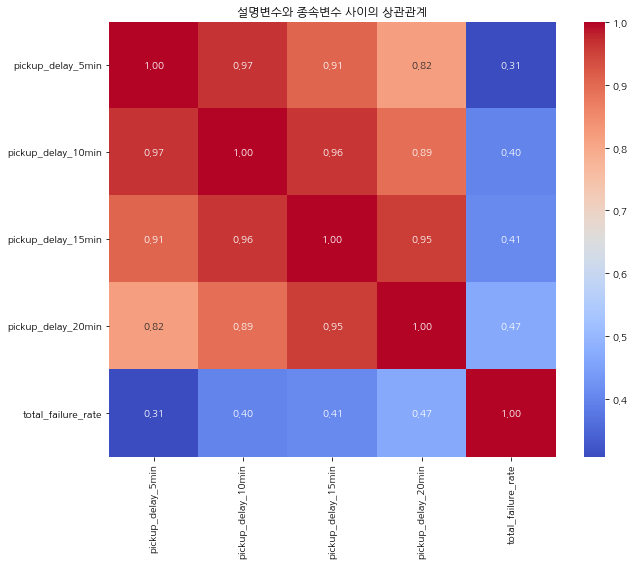

In [20]:
# 설명변수와 종속변수 포함한 데이터 프레임 생성
correlation_data = data_new[['pickup_delay_5min', 'pickup_delay_10min', 'pickup_delay_15min', 'pickup_delay_20min', 'total_failure_rate']]

# 상관계수 계산
correlation_matrix = correlation_data.corr()

# 상관계수 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('설명변수와 종속변수 사이의 상관관계')
plt.show()


In [22]:
# 각 설명변수에 대한 단순 선형회귀 분석 수행 및 결과 저장
simple_linear_results = {}

for col in ['pickup_delay_5min', 'pickup_delay_10min', 'pickup_delay_15min', 'pickup_delay_20min']:
    X_simple = sm.add_constant(data_new[[col]])  # 상수항 추가
    y_simple = data_new['total_failure_rate']
    model_simple = sm.OLS(y_simple, X_simple).fit()
    simple_linear_results[col] = model_simple.summary()

simple_linear_results['pickup_delay_5min']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_failure_rate   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     18.81
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           2.40e-05
Time:                        17:23:58   Log-Likelihood:                 236.38
No. Observations:                 182   AIC:                            -468.8
Df Residuals:                     180   BIC:                            -462.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0058      0.017     -0.333      0.740      -0.040       0.028
pickup_delay_5min     0.1635      0.038      4.338      0.000       0.089       0.238
==============================================================================
Omnibus:                      144.727   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1307.044
Skew:                           3.097   Prob(JB):                    1.51e-284
Kurtosis:                      14.576   Cond. No.                         9.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# 나머지 픽업 지연 시간 구간에 대한 단순 선형회귀 분석 결과 출력
simple_linear_results_keys = ['pickup_delay_10min', 'pickup_delay_15min', 'pickup_delay_20min']

# 각 변수에 대한 결과 요약 출력
for key in simple_linear_results_keys:
    print(f"Results for {key}:")
    print(simple_linear_results[key], "\n\n")


Results for pickup_delay_10min:
                            OLS Regression Results                            
Dep. Variable:     total_failure_rate   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     33.90
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           2.61e-08
Time:                        17:23:58   Log-Likelihood:                 243.04
No. Observations:                 182   AIC:                            -482.1
Df Residuals:                     180   BIC:                            -475.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
cons

In [24]:
from scipy.stats import pearsonr

# 상관관계 및 p-value 계산
correlation_results = {}
for col in ['pickup_delay_5min', 'pickup_delay_10min', 'pickup_delay_15min', 'pickup_delay_20min']:
    correlation, p_value = pearsonr(data_new[col], data_new['total_failure_rate'])
    correlation_results[col] = (correlation, p_value)

correlation_results


{'pickup_delay_5min': (0.3076289143105443, 2.3952731371946218e-05),
 'pickup_delay_10min': (0.3981164268892595, 2.611261976465144e-08),
 'pickup_delay_15min': (0.4080603153484723, 1.0780428218167547e-08),
 'pickup_delay_20min': (0.46871414362181224, 2.5037395816070837e-11)}

In [28]:

# 'pickup_delay_*min' 열의 비율(%) 문자열을 실수형으로 변환
for col in ['pickup_delay_5min', 'pickup_delay_10min', 'pickup_delay_15min', 'pickup_delay_20min']:
    data_new[col] = data_new[col].str.rstrip('%').astype('float') / 100.0

# "avg_delivery_time" 변수와 픽업지연률 변수들을 사용한 선형회귀분석 수행
linear_regression_results = {}

# 설명변수 "avg_delivery_time"에 대한 데이터 준비
X = sm.add_constant(data_new['avg_delivery_time'])  # 상수항 추가

# 종속변수별로 선형회귀 모델 학습 및 결과 저장
dependent_vars = ['pickup_delay_5min', 'pickup_delay_10min', 'pickup_delay_15min', 'pickup_delay_20min']
for dep_var in dependent_vars:
    model = sm.OLS(data_new[dep_var], X).fit()
    linear_regression_results[dep_var] = model.summary()

linear_regression_results['pickup_delay_5min']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      pickup_delay_5min   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     498.7
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           9.22e-54
Time:                        18:08:39   Log-Likelihood:                 233.05
No. Observations:                 182   AIC:                            -462.1
Df Residuals:                     180   BIC:                            -455.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6135      0.047    -12.923      0.000      -0.707      -0.520
avg_delivery_time     0.0313      0.001     22.331      0.000       0.029       0.034
==============================================================================
Omnibus:                        5.329   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                7.741
Skew:                          -0.045   Prob(JB):                       0.0209
Kurtosis:                       4.006   Cond. No.                         321.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# 이전 코드 실행에서 발생한 오류를 수정하고 나머지 변수들에 대한 선형회귀 분석 결과를 출력합니다.

# 나머지 변수들에 대한 선형회귀 모델 학습 및 요약 결과 저장
for dep_var in ['pickup_delay_10min', 'pickup_delay_15min', 'pickup_delay_20min']:
    model = sm.OLS(data_new[dep_var], X).fit()
    linear_regression_results[dep_var] = model.summary()

# 모든 변수에 대한 선형회귀 분석 결과 출력
for key, result in linear_regression_results.items():
    print(f"Results for {key}:")
    print(result, "\n\n")


Results for pickup_delay_5min:
                            OLS Regression Results                            
Dep. Variable:      pickup_delay_5min   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     498.7
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           9.22e-54
Time:                        18:08:39   Log-Likelihood:                 233.05
No. Observations:                 182   AIC:                            -462.1
Df Residuals:                     180   BIC:                            -455.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const  